In [7]:
!pip install -U langgraph
!pip install langchain-openai
!pip install langchain
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00


In [16]:

from langchain_openai import ChatOpenAI
import os
os.environ["OPENAI_API_KEY"] = ''
os.environ["TAVILY_API_KEY"]=''

In [3]:
# 상태 설정
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
  messages: Annotated[list, add_messages]


In [8]:
# ToolNode로 도구 노드 구축
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode, tools_condition

tool = TavilySearchResults(max_results = 2)
tools = [tool]
tool_node = ToolNode(tools)

In [9]:
# LLM 챗봇 설정
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model = "gpt-4o-mini")
model_with_tools = llm.bind_tools(tools)


def chatbot_function(state: State):
  result = model_with_tools.invoke(state["messages"])
  return {"messages":[result]}

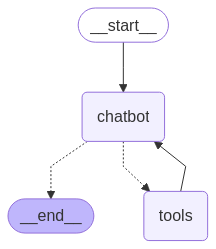

In [12]:
# 그래프 구축
from langgraph.graph import StateGraph

workflow = StateGraph(State)

workflow.add_node("chatbot", chatbot_function)
workflow.add_node("tools", tool_node)

workflow.add_edge("tools", "chatbot")

workflow.add_conditional_edges("chatbot",tools_condition)

workflow.set_entry_point("chatbot")

app = workflow.compile()

# 그래프 시각화
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))


In [13]:
app.invoke({
    "messages": {
        "role":"user",
        "content": "지금 한국대통령 누구냐"
        }
            })

{'messages': [HumanMessage(content='지금 한국대통령 누구냐', additional_kwargs={}, response_metadata={}, id='1bd9f0ad-dfa0-47cb-a6e0-930ed50d7508'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_03pM1KAtlK57jaqs11ytGN8B', 'function': {'arguments': '{"query":"현재 한국 대통령"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 86, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BcAICNpmVP0BgVIXtgYoK3pkBvxKD', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a78103ec-67c5-48d8-acf5-53dd0968e267-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': '현

In [15]:
app.invoke({
    "messages": {
        "role":"user",
        "content": "사과 영어로"
        }
            })

{'messages': [HumanMessage(content='사과 영어로', additional_kwargs={}, response_metadata={}, id='a20420be-607b-4ae5-b2ee-bd6e66fab07b'),
  AIMessage(content='사과는 영어로 "apple"이라고 합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 83, 'total_tokens': 95, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BcAKDm6U7n3mWWwFrtzOYwU0qlI1q', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4c34aab5-539c-4ff9-8eb7-4ff2cce66d98-0', usage_metadata={'input_tokens': 83, 'output_tokens': 12, 'total_tokens': 95, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}